# **TITANIC SURVIVAL PREDICTION**

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Load Dataset

In [ ]:
df_train = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Creating new featues and modifying the DataFrame

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                               'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                               'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

In [ ]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone Title  
0      0         A/5 21171   7.2500   NaN        S           2        0    Mr  
1      0          PC 17599  71.2833   C85        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S           1        1  Miss  


Observing the statistics of final DataFrame

In [ ]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602    0.602694  
std      0.806057   49.693429    1.613459    0.489615  
min      0.000000    0.000000    1.000000    0.000000  
25%      0.000000    7.910400    1.000000    0.000000  
50%      0.000000   14.454200    

Visualizing Survival column

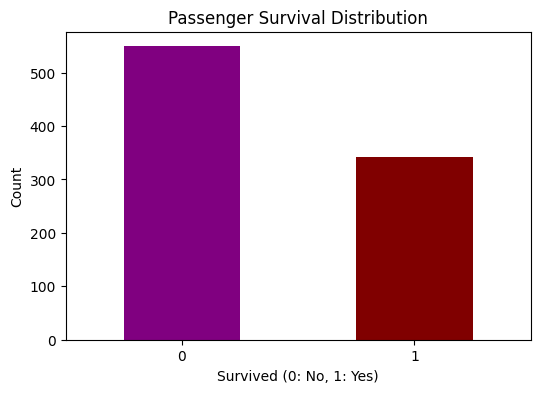

In [ ]:
plt.figure(figsize=(6, 4))
df_train['Survived'].value_counts().plot(kind='bar', color=['purple', 'maroon'])
plt.title('Passenger Survival Distribution')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Gender Distribution Visualization

Text(0, 0.5, 'Count')

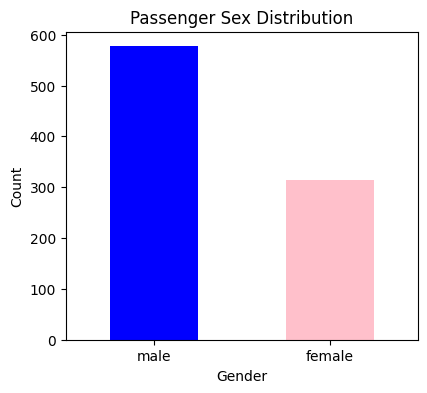

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df_train['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Passenger Sex Distribution')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

Visualisation of Passenger Embarkation Distribution

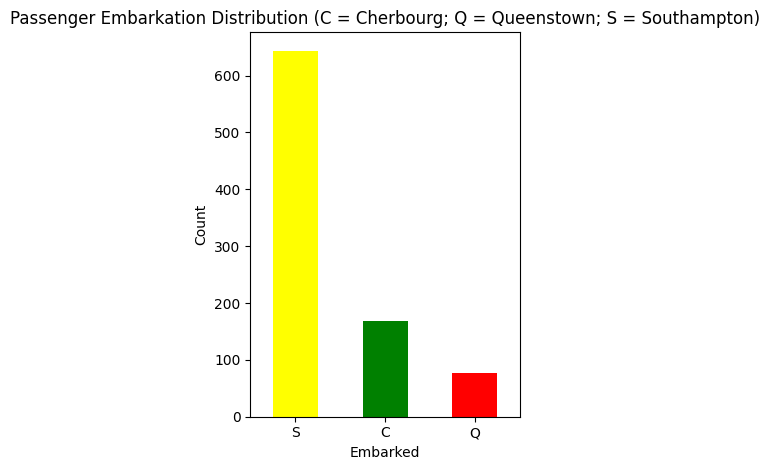

In [ ]:
plt.subplot(1, 2, 2)
df_train['Embarked'].value_counts().plot(kind='bar', color=['yellow', 'green', 'red'])
plt.title('Passenger Embarkation Distribution (C = Cherbourg; Q = Queenstown; S = Southampton)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Missing Values

In [ ]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
IsAlone          0
Title            0
dtype: int64


Missing Values in Percentages

In [ ]:
missing_values_df = (df_train.isnull().sum() / len(df_train)) * 100
print(missing_values_df.to_frame('Percentage Missing').sort_values(by='Percentage Missing', ascending=False))

             Percentage Missing
Cabin                 77.104377
Age                   19.865320
Embarked               0.224467
PassengerId            0.000000
Survived               0.000000
Pclass                 0.000000
Name                   0.000000
Sex                    0.000000
SibSp                  0.000000
Parch                  0.000000
Ticket                 0.000000
Fare                   0.000000
FamilySize             0.000000
IsAlone                0.000000
Title                  0.000000


Pipeline structure

**Imputing missing values of numeric features with median and scaler and One-hot encoder for categorical features using Pipeline**

---



In [ ]:
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_features = ['Sex', 'Embarked', 'Title', 'IsAlone']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

Column Transformer

**Combine transformers of categorical and numeric features into a ColumnTransformer**

---



In [ ]:
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)]
)

Splitting features and target variables

In [ ]:
X = df_train[numeric_features + categorical_features]
y = df_train['Survived']

Splitting into training and validation sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Model Pipeline

**Pipeline to preprocess data and then apply RandomForestClassifier**

---



In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

Tuning Hyperparameter (GridSearchCV)

In [35]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'FamilySize']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Title',
                                                                          'IsAlone'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

Best Model from grid search

In [37]:
best_model = grid_search.best_estimator_

Make predictions on validation set

In [38]:
y_pred = best_model.predict(X_val)

***Result of the model***

---



In [39]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print("Accuracy:", accuracy," - ",round(accuracy*100,2),"%")
print("Precision:", precision," - ",round(precision*100,2),"%")
print("Recall:", recall," - ",round(recall*100,2),"%")
print("F1 Score:", f1," - ",round(f1*100,2),"%")
print("Classification Report:\n", classification_rep)

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean())

Accuracy: 0.8324022346368715  -  83.24 %
Precision: 0.8235294117647058  -  82.35 %
Recall: 0.7567567567567568  -  75.68 %
F1 Score: 0.7887323943661971  -  78.87 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Cross-validation Accuracy: 0.822666499278137
